# Create Figures

# Objective

This notebook demonstrates the following:

- Create figures examining trends of NFIP claims in New York City

In [1]:
# import libraries
from datetime import datetime
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# reproducibility
%reload_ext watermark
%watermark -v -p duckdb,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

duckdb    : 1.0.0
pandas    : 1.5.1
matplotlib: 3.6.2
seaborn   : 0.12.1



In [3]:
# data retrieved
current_date = datetime.now()
print(f"This notebook was executed on {current_date.strftime('%Y-%m-%d')}.")

This notebook was executed on 2025-03-23.


# Getting Started: OpenFEMA
- [OpenFEMA](https://www.fema.gov/about/reports-and-data/openfema): The public’s resource for FEMA program data. Promoting a culture of Open Government and increasing transparency, participation, and collaboration among the Whole Community in support of FEMA's mission to help people before, during, and after disasters.


- [OpenFEMA Developer Resources](https://www.fema.gov/about/openfema/developer-resources): Welcome to the OpenFEMA Developer Resources page, devoted to providing additional development information regarding our Application Programming Interface (API) for use in your applications and mashups.  The API is free of charge and does not currently have user registration requirements.


- [OpenFEMA API Documentation](https://www.fema.gov/about/openfema/api): As part of the OpenFEMA initiative, FEMA is providing read-only API based access to datasets (Entities). The data is exposed using a RESTful interface that uses query string parameters to manage the query. Use of the service is free and does not require a subscription or API key.


- [OpenFEMA Terms and Conditions](https://www.fema.gov/about/openfema/terms-conditions): Respect the OpenFEMA API and content on this website. Use the Site in a lawful manner. Do not modify the Site or attempt to use it to publish or transmit malicious software or content. FEMA shall not be liable for any damages resulting from the use of this website, API services, or content. Do not attempt to reidentify the individuals whose data may be aggregated. We may suspend your access to this website if we feel you have not complied with these terms and conditions..

# OpenFEMA Dataset: FIMA NFIP Redacted Claims - v2

[OpenFEMA Dataset: FIMA NFIP Redacted Claims - v2](https://www.fema.gov/openfema-data-page/fima-nfip-redacted-claims-v2): Congress passed the National Flood Insurance Act (NFIA), 42 U.S.C. 4001 in 1968, creating the National Flood Insurance Program (NFIP) in order to reduce future flood losses through flood hazard identification, floodplain management, and providing insurance protection. This dataset provides details on NFIP claims transactions. It is derived from the NFIP system of record, staged in the NFIP reporting platform and redacted to protect policy holder personally identifiable information.

In [4]:
# create a DuckDB database instance
con = duckdb.connect()

# create table claims of dataset
con.execute("""
    CREATE TABLE claims AS
        FROM read_parquet('data/nfip-claims-nyc.parquet')
""")

# sanity check
sql = """
    SELECT *
    FROM claims
    LIMIT 5
"""

con.sql(sql)

┌──────────────────────┬──────────────────────┬───┬──────────────┬──────────────┬──────────────────────┐
│ agricultureStructu…  │       asOfDate       │ … │   latitude   │  longitude   │          id          │
│       boolean        │ timestamp with tim…  │   │ decimal(9,1) │ decimal(9,1) │         uuid         │
├──────────────────────┼──────────────────────┼───┼──────────────┼──────────────┼──────────────────────┤
│ false                │ 2020-09-10 15:02:5…  │ … │         40.8 │        -73.8 │ 80349555-9429-4ec2…  │
│ false                │ 2020-01-22 11:55:5…  │ … │         40.6 │        -73.8 │ 6b0b9d4a-69bd-41f3…  │
│ false                │ 2019-10-18 16:33:0…  │ … │         40.6 │        -74.2 │ 5356c5f2-49e8-45cf…  │
│ false                │ 2019-10-18 23:42:0…  │ … │         40.6 │        -74.2 │ 46e665bc-5117-42ec…  │
│ false                │ 2019-10-18 16:33:0…  │ … │         40.6 │        -74.1 │ 37046c8c-2ba2-4662…  │
├──────────────────────┴──────────────────────┴───┴────

In [5]:
# sanity check
sql = """
    SELECT COUNT(*) AS count
    FROM claims
"""

con.sql(sql)

┌───────┐
│ count │
│ int64 │
├───────┤
│ 43978 │
└───────┘

In [6]:
# sanity check
sql = """
    SELECT
        COUNT(column_name) AS count_columns
    FROM
        (DESCRIBE FROM claims)
"""

con.sql(sql)

┌───────────────┐
│ count_columns │
│     int64     │
├───────────────┤
│            73 │
└───────────────┘

In [7]:
# sanity check
sql = """
    SELECT
        asOfDate
    FROM
        claims
    ORDER BY
        asOfDate DESC
    LIMIT 1
"""

con.sql(sql)

┌──────────────────────────────┐
│           asOfDate           │
│   timestamp with time zone   │
├──────────────────────────────┤
│ 2025-03-10 11:48:30.72929-04 │
└──────────────────────────────┘

In [8]:
# sanity check
sql = """
    SELECT
        asOfDate
    FROM
        claims
    ORDER BY
        asOfDate ASC
    LIMIT 1
"""

con.sql(sql)

┌────────────────────────────┐
│          asOfDate          │
│  timestamp with time zone  │
├────────────────────────────┤
│ 2019-09-19 02:12:43.388-04 │
└────────────────────────────┘

In [9]:
# sanity check
sql = """
    SELECT
        column_name,
        column_type
    FROM
        (DESCRIBE claims)
"""

con.sql(sql).show(max_rows=80)

┌────────────────────────────────────────────┬──────────────────────────┐
│                column_name                 │       column_type        │
│                  varchar                   │         varchar          │
├────────────────────────────────────────────┼──────────────────────────┤
│ agricultureStructureIndicator              │ BOOLEAN                  │
│ asOfDate                                   │ TIMESTAMP WITH TIME ZONE │
│ basementEnclosureCrawlspaceType            │ SMALLINT                 │
│ policyCount                                │ SMALLINT                 │
│ crsClassificationCode                      │ SMALLINT                 │
│ dateOfLoss                                 │ DATE                     │
│ elevatedBuildingIndicator                  │ BOOLEAN                  │
│ elevationCertificateIndicator              │ VARCHAR                  │
│ elevationDifference                        │ DECIMAL(6,1)             │
│ baseFloodElevation                  

In [10]:
# sanity check
sql = """
    SELECT
        column_name,
        null_percentage
    FROM
        (SUMMARIZE FROM claims)
    WHERE
        null_percentage > 0
    ORDER BY
        null_percentage DESC
"""

con.sql(sql).show(max_rows=80)

┌────────────────────────────────────────────┬─────────────────┐
│                column_name                 │ null_percentage │
│                  varchar                   │  decimal(9,2)   │
├────────────────────────────────────────────┼─────────────────┤
│ crsClassificationCode                      │          100.00 │
│ floodCharacteristicsIndicator              │           99.70 │
│ eventDesignationNumber                     │           97.31 │
│ lowestAdjacentGrade                        │           87.20 │
│ lowestFloorElevation                       │           86.93 │
│ baseFloodElevation                         │           86.62 │
│ elevationDifference                        │           86.50 │
│ nonPaymentReasonBuilding                   │           80.12 │
│ nonPaymentReasonContents                   │           74.26 │
│ nfipCommunityNumberCurrent                 │           73.34 │
│ floodZoneCurrent                           │           73.34 │
│ nfipCommunityName      

In [11]:
# sanity check
sql = """
    WITH date_columns AS (
        SELECT
            column_name,
            column_type
        FROM
            (DESCRIBE claims)
    )
    
    SELECT *
    FROM date_columns 
    WHERE column_type = 'DATE'
"""

con.sql(sql).show(max_rows=80)

┌──────────────────────────┬─────────────┐
│       column_name        │ column_type │
│         varchar          │   varchar   │
├──────────────────────────┼─────────────┤
│ dateOfLoss               │ DATE        │
│ originalConstructionDate │ DATE        │
│ originalNBDate           │ DATE        │
└──────────────────────────┴─────────────┘



In [12]:
# sanity check
sql = """
    WITH date_columns AS (
        SELECT
            dateOfLoss,
            originalConstructionDate,
            originalNBDate
        FROM
            claims
    )  
    SELECT * FROM (SUMMARIZE date_columns)
"""

con.sql(sql).to_df()

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,dateOfLoss,DATE,1978-01-01,2025-03-02,2500,NaN,NaN,NaN,NaN,NaN,43978,0.00
1,originalConstructionDate,DATE,1492-10-12,2022-06-24,4822,NaN,NaN,NaN,NaN,NaN,43978,0.01
2,originalNBDate,DATE,1975-09-06,2024-09-25,10811,NaN,NaN,NaN,NaN,NaN,43978,0.00


Oldest buildings in NYC: https://en.wikipedia.org/wiki/List_of_the_oldest_buildings_in_New_York

In [13]:
sql = """
    UPDATE claims
        SET
            originalConstructionDate = NULL
        WHERE
            EXTRACT('year' FROM originalConstructionDate) < 1652
"""

con.sql(sql)

In [14]:
# sanity check
sql = """
    WITH date_columns AS (
        SELECT
            dateOfLoss,
            originalConstructionDate,
            originalNBDate
        FROM
            claims
    )  
    SELECT column_name, min FROM (SUMMARIZE date_columns)
"""

con.sql(sql).to_df()

,column_name,min
0,dateOfLoss,1978-01-01
1,originalConstructionDate,1860-05-01
2,originalNBDate,1975-09-06


In [15]:
# sanity check
sql = """
    SELECT
        floodEvent,
        yearOfLoss,
        COUNT(*) AS count,
        ROUND(
            SUM(amountPaidOnBuildingClaim)
            + SUM(amountPaidOnContentsClaim)
            + SUM(amountPaidOnIncreasedCostOfComplianceClaim), 0)::BIGINT AS total_claim,
        ROUND((SUM(amountPaidOnBuildingClaim)
            + SUM(amountPaidOnContentsClaim)
            + SUM(amountPaidOnIncreasedCostOfComplianceClaim)) / 1_000_000, 3) AS total_claimM,
        ROUND((SUM(amountPaidOnBuildingClaim)
            + SUM(amountPaidOnContentsClaim)
            + SUM(amountPaidOnIncreasedCostOfComplianceClaim)
        ) / count, 0)::INT AS average_claim 
    FROM
        claims
    WHERE
        floodEvent NOT NULL
    GROUP BY
        floodEvent, yearOfLoss
    ORDER BY
        total_claim DESC
    LIMIT
        15
"""

df = con.sql(sql).to_df()

print(df.shape)
df

(15, 6)


,floodEvent,yearOfLoss,count,total_claim,total_claimM,average_claim
0,Hurricane Sandy,2012,16504,1296569224,1296.569,78561
1,Hurricane Ida,2021,1115,29973738,29.974,26882
2,Hurricane Irene,2011,2322,22690213,22.690,9772
3,December Storm - Nor'easter,1992,1916,18051904,18.052,9422
4,Late-September New York Flooding,2023,449,9122585,9.123,20318
5,Not a named storm,1979,2305,6185619,6.186,2684
6,Nor'easter,2010,371,2689085,2.689,7248
7,Mid-spring storms,2014,176,2671859,2.672,15181
8,Flooding,1996,257,2173502,2.174,8457
9,Late summer storms,2011,347,2016615,2.017,5812


In [16]:
# sanity check
sql = """
    SELECT
        EXTRACT('year' FROM dateOfLoss) AS yearOfLoss,
        COUNT(*) AS count,
        ROUND(
            SUM(amountPaidOnBuildingClaim)
            + SUM(amountPaidOnContentsClaim)
            + SUM(amountPaidOnIncreasedCostOfComplianceClaim), 0)::BIGINT AS total_claim,
        ROUND((SUM(amountPaidOnBuildingClaim)
            + SUM(amountPaidOnContentsClaim)
            + SUM(amountPaidOnIncreasedCostOfComplianceClaim)) / 1_000_000, 3) AS total_claimM,
        ROUND((SUM(amountPaidOnBuildingClaim)
            + SUM(amountPaidOnContentsClaim)
            + SUM(amountPaidOnIncreasedCostOfComplianceClaim)
        ) / count, 0)::INT AS average_claim 
    FROM
        claims
    WHERE
        yearOfLoss != 2025  
    GROUP BY
        EXTRACT('year' FROM dateOfLoss)
    ORDER BY
        total_claim DESC
    LIMIT
        15    
        
"""

df = con.sql(sql).to_df()
print(df.shape)

(15, 5)


In [17]:
top_ten = (
    df
    .sort_values(by='total_claim', ascending=False)
    .head(10)
    .assign(rank=range(1, 11))
)

cols = [
    'rank', 'yearOfLoss',
    'count', 'total_claim', 'total_claimM', 'average_claim'
]

top_ten = top_ten.loc[:, cols]

top_ten

,rank,yearOfLoss,count,total_claim,total_claimM,average_claim
0,1,2012,16656,1299373061,1299.373,78012
1,2,2021,1295,31821958,31.822,24573
2,3,2011,2771,24945672,24.946,9002
3,4,1992,1964,18375480,18.375,9356
4,5,1979,4693,12781324,12.781,2723
5,6,2023,592,11620002,11.620,19628
6,7,2022,531,11535189,11.535,21724
7,8,1980,4171,7723211,7.723,1852
8,9,1978,2498,6634539,6.635,2656
9,10,1996,488,4828953,4.829,9895


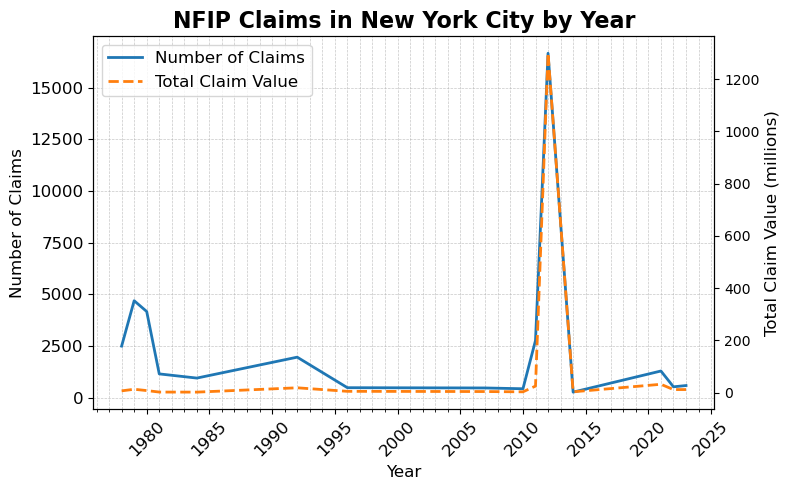

In [18]:
# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the number of claims (count_year) on the first axis with a thicker line
sns.lineplot(
    data=df,
    x='yearOfLoss',
    y='count',
    ax=ax1,
    color='C0',
    linewidth=2,  # Thicker line for better visibility
    label='Number of Claims'  # Add a label for the legend
)

# Create a second y-axis for the amount paid (total_claim)
ax2 = ax1.twinx()

# Plot the total claim amount (total_claim) on the second axis with a different line style
sns.lineplot(
    data=df,
    x='yearOfLoss',
    y='total_claimM',
    ax=ax2,
    color='C1',
    linewidth=2,  # Thicker line for better visibility
    linestyle='--',  # Dashed line for differentiation
    label='Total Claim Value'  # Add a label for the legend
)

# Set the title and labels with clear and concise text
ax1.set_title('NFIP Claims in New York City by Year', fontsize=16, weight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Claims', fontsize=12)
ax2.set_ylabel('Total Claim Value (millions)', fontsize=12)

# Set the x-axis major and minor ticks
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))

# Improve tick label formatting
ax1.tick_params(axis='x', rotation=45)  # Rotate x-ticks for better readability
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=10)

# Add a grid with lighter lines and make sure the grid is only on the primary axis
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Combine the legends from both axes and put them in the upper left
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the handles and labels from both axes
ax1.legend(handles + handles2, labels + labels2, loc='upper left', fontsize=12)
ax2.legend().set_visible(False)

# Tight layout to adjust spacing
plt.tight_layout()

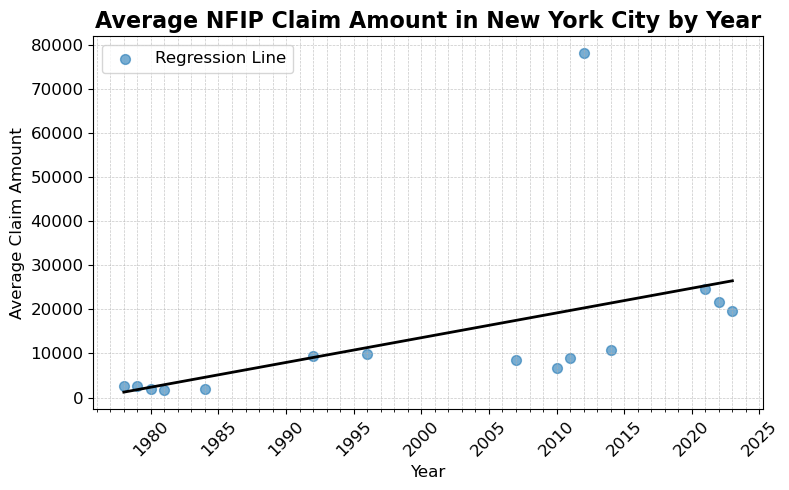

In [19]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the number of claims (average_claim) with a regression line
sns.regplot(
    data=df,
    x='yearOfLoss',
    y='average_claim',
    ax=ax,
    color='C0',
    scatter_kws={'s': 50, 'alpha': 0.6},  # Adjust scatter point size and transparency
    line_kws={'color': 'black', 'linewidth': 2},  # Make the regression line black and thicker
    label='Regression Line',  # Properly label the regression line
    ci=None  # Remove confidence interval shading for cleaner presentation
)

# Set the title and labels with clear and concise text
ax.set_title('Average NFIP Claim Amount in New York City by Year', fontsize=16, weight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Claim Amount', fontsize=12)

# Set the x-axis major and minor ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

# Improve tick label formatting
ax.tick_params(axis='x', rotation=45)  # Rotate x-ticks for better readability
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Add a grid with lighter lines and make sure the grid is only on the primary axis
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add the legend
ax.legend(loc='upper left', fontsize=12)

# Tight layout to adjust spacing
plt.tight_layout()

In [20]:
# sanity check
sql = """
    SELECT
        dateOfLoss,
        EXTRACT('month' FROM dateOfLoss) AS month,
        amountPaidOnBuildingClaim 
        + amountPaidOnContentsClaim 
        + amountPaidOnIncreasedCostOfComplianceClaim AS total_claim
    FROM
        claims 
"""

df = con.sql(sql).to_df()

print(df.shape)
df.head()

(43978, 3)


,dateOfLoss,month,total_claim
0,2012-10-29,10,10937.25
1,2012-10-29,10,92128.37
2,1980-07-29,7,3085.00
3,1979-01-21,1,3500.00
4,1980-07-05,7,NaN


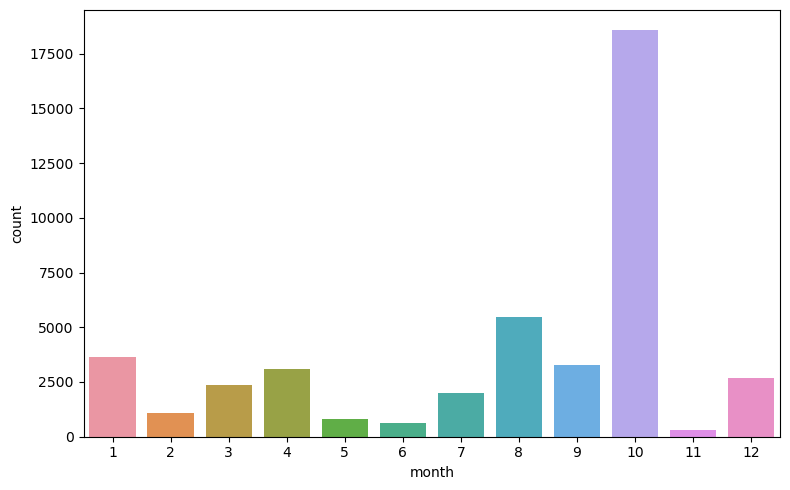

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))

data = (
    df
    .groupby(by='month')['dateOfLoss']
    .count()
    .rename('count')
    .reset_index()
)

sns.barplot(
    data=data,
    x="month",
    y="count",
    ax=ax
)

plt.tight_layout()

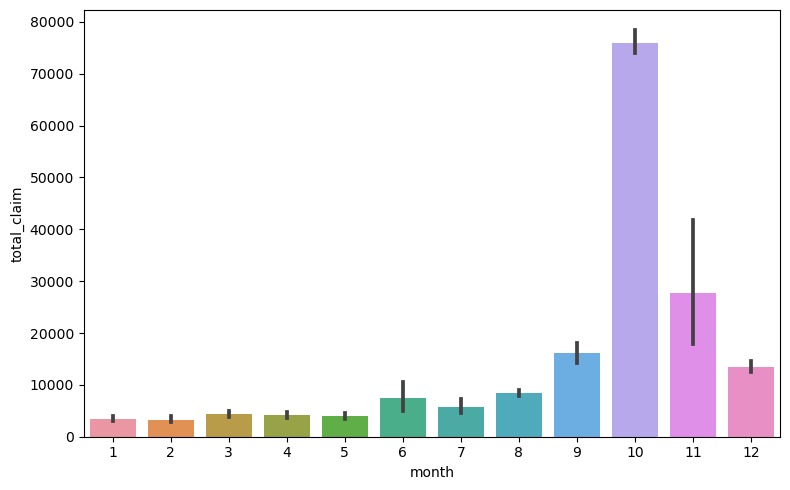

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(
    data=df,
    x="month",
    y="total_claim",
    ax=ax
)

plt.tight_layout()